# 50K Songs Dataset Analysis

## Overview
This notebook presents an in-depth analysis of a **50K Songs Dataset**, which contains fictional data on 50,000 songs across various music genres. The dataset includes key attributes such as song popularity, stream count, genre, artist, album, and language. Using **pandas**, **Matplotlib**, and **Seaborn**, this analysis explores the relationships between these features and uncovers trends in song popularity, genre distributions, and other musical characteristics.

## Objectives
The main objectives of this analysis are to:
- Explore the general structure of the dataset and identify key features.
- Analyze trends in song popularity and stream counts.
- Investigate the distribution of songs across different genres and languages.
- Examine the impact of song duration, release year, and explicit content on popularity.
- Visualize insights to understand patterns and make comparisons between different song characteristics.

## Sections

### 1. Dataset Overview
In this section, we load and explore the dataset. We examine the basic structure, check for missing values, and calculate summary statistics for the numerical columns. This gives us an initial understanding of the dataset.

### 2. Popularity Analysis
We identify the top 10 most popular songs in the dataset, based on their popularity scores. The analysis will also explore what factors contribute to a song's popularity and how different characteristics like genre or language might correlate with high popularity.

### 3. Genre Trends
This section investigates the distribution of songs across different genres and calculates the average popularity scores for each genre. We explore which genres dominate the dataset and how their popularity varies.

### 4. Stream Analysis
We examine how song streams correlate with song characteristics such as duration and popularity. This section highlights whether longer songs or songs with higher popularity tend to receive more streams.

### 5. Language Trends
In this section, we explore the distribution of songs by language and analyze how the language of a song may impact its popularity. We also check which languages are most prevalent in the dataset.

### 6. Release Date Trends
This section analyzes how song popularity has evolved over time, based on their release years. We examine trends in average popularity over the years and discuss any noticeable patterns.

### 7. Explicit Content Impact
We investigate whether explicit content in songs has an impact on their popularity. By comparing the average popularity scores for explicit vs. non-explicit songs, we aim to understand the relationship between explicit content and listener preferences.

## Conclusion
At the end of this notebook, we summarize the key insights drawn from the analysis, highlighting important trends and correlations between song characteristics. The analysis will provide a deeper understanding of how factors like genre, language, and explicit content can influence song popularity in a fictional music dataset.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/kaggle/input/spotify-songs-dataset/spotify_songs_dataset.csv')

# Preview the dataset
df.head()


,song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
0,SP0001,Space executive series.,Sydney Clark,What.,Electronic,1997-11-08,282.0,42,35055874,English,Yes,Def Jam,Amy Hatfield,Jeffrey Weaver,NaN
1,SP0002,Price last painting.,Connor Peters DDS,Nature politics.,Electronic,2015-05-10,127.0,50,9249527,English,Yes,Universal Music,Jason Gregory,Kenneth White,NaN
2,SP0003,Piece.,Anna Keith,Visit.,Pop,2024-07-08,NaN,10,76669110,English,Yes,Universal Music,Rachel Lopez,Jason Barnes,NaN
3,SP0004,Power industry your.,Zachary Simpson,Behavior evening.,Hip-Hop,2022-08-15,214.0,86,34732016,English,No,Sony Music,Thomas Li,Mrs. Becky Palmer,NaN
4,SP0005,Food animal second.,Christopher Mcgee,Front.,Pop,2023-03-05,273.0,63,96649372,English,Yes,Def Jam,Adam Wagner,Beverly Baker,NaN


In [2]:
print(df.isnull().sum())


song_id                 0
song_title              0
artist                  0
album                   0
genre                   0
release_date            0
duration             5000
popularity              0
stream                  0
language             2500
explicit_content        0
label                   0
composer                0
producer                0
collaboration       35000
dtype: int64


In [3]:
print(df.describe())

           duration    popularity        stream
count  45000.000000  50000.000000  5.000000e+04
mean     239.659178     50.783440  5.019183e+07
std       50.136727     28.948749  2.893624e+07
min       33.000000      1.000000  1.899000e+03
25%      206.000000     26.000000  2.523311e+07
50%      240.000000     51.000000  5.042169e+07
75%      273.000000     76.000000  7.519064e+07
max      433.000000    100.000000  9.999913e+07


In [4]:
print(df.describe())

           duration    popularity        stream
count  45000.000000  50000.000000  5.000000e+04
mean     239.659178     50.783440  5.019183e+07
std       50.136727     28.948749  2.893624e+07
min       33.000000      1.000000  1.899000e+03
25%      206.000000     26.000000  2.523311e+07
50%      240.000000     51.000000  5.042169e+07
75%      273.000000     76.000000  7.519064e+07
max      433.000000    100.000000  9.999913e+07


## What are the top 10 most popular songs?

In [5]:
# Sort songs by popularity
top_popular_songs = df[['song_title', 'artist', 'popularity']].sort_values(by='popularity', ascending=False).head(10)

print(top_popular_songs)


                             song_title             artist  popularity
3778                 Clear range house.        Paul Fisher         100
8043                        Guess huge.  Stephanie Vasquez         100
32632                      Seek strong.      Taylor Harris         100
32634  School provide crime investment.      Anthony Meyer         100
34220                           Detail.     Kristen Mendez         100
38917        Have particularly kitchen.         Alec Clark         100
28728                         Low seat.       Jeffrey Beck         100
44332                 Manage unit city.         Cathy Diaz         100
20025              Traditional nothing.      Andrew Vaughn         100
7932                  Also share large.     Jose Armstrong         100


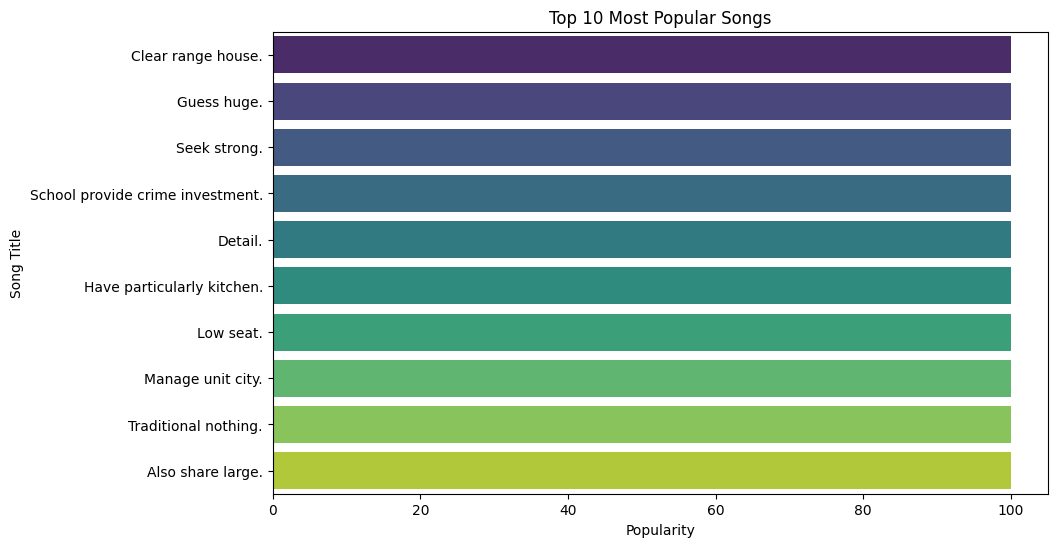

In [6]:
# Barplot of top 10 songs by popularity
plt.figure(figsize=(10, 6))
sns.barplot(data=top_popular_songs, x='popularity', y='song_title', palette='viridis')
plt.title('Top 10 Most Popular Songs')
plt.xlabel('Popularity')
plt.ylabel('Song Title')
plt.show()


## Which genres have the most songs, and what are their average popularity scores?

In [7]:
# Count of songs per genre
genre_counts = df['genre'].value_counts()

print(genre_counts.head(10))

# Average popularity by genre
genre_popularity = df.groupby('genre')['popularity'].mean().sort_values(ascending=False)

print(genre_popularity.head(10))


genre
Electronic    12568
Pop           12534
Hip-Hop       12298
Folk           2559
Classical      2542
Country        2511
Jazz           2504
R&B            1513
Reggae          971
Name: count, dtype: int64
genre
Country       51.661888
Folk          51.467370
Hip-Hop       50.918117
Electronic    50.853517
Pop           50.684059
Jazz          50.431310
R&B           50.335096
Reggae        49.954686
Classical     49.649489
Name: popularity, dtype: float64


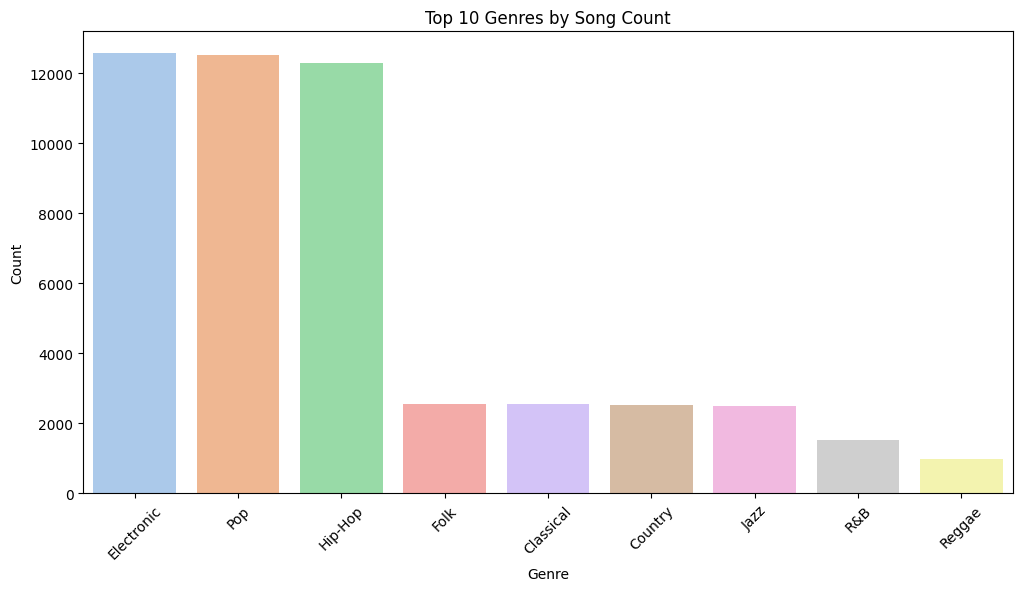

In [8]:
# Visualizing top 10 genres by song count
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.head(10).index, y=genre_counts.head(10).values, palette='pastel')
plt.title('Top 10 Genres by Song Count')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## How does stream count correlate with song duration and popularity?

In [9]:
# Correlation matrix
correlation = df[['stream', 'duration', 'popularity']].corr()

print(correlation)


              stream  duration  popularity
stream      1.000000  0.000947   -0.000579
duration    0.000947  1.000000    0.000256
popularity -0.000579  0.000256    1.000000


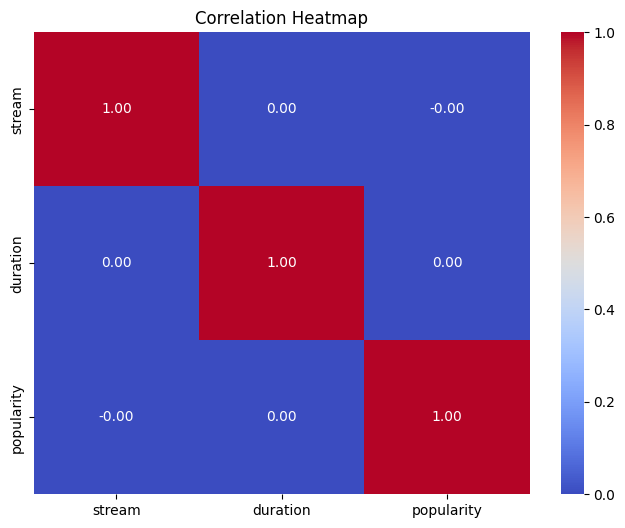

In [10]:
# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


## Which languages are most common, and how does language affect popularity?

In [11]:
# Count of songs by language
language_counts = df['language'].value_counts()

print(language_counts.head(10))

# Average popularity by language
language_popularity = df.groupby('language')['popularity'].mean().sort_values(ascending=False)

print(language_popularity.head(10))


language
English     33299
Spanish      4725
French       2419
Korean       2328
Italian      1902
Japanese     1417
German       1410
Name: count, dtype: int64
language
German      51.637589
Italian     51.139327
English     50.899036
French      50.763125
Spanish     50.400635
Japanese    50.335921
Korean      50.026632
Name: popularity, dtype: float64


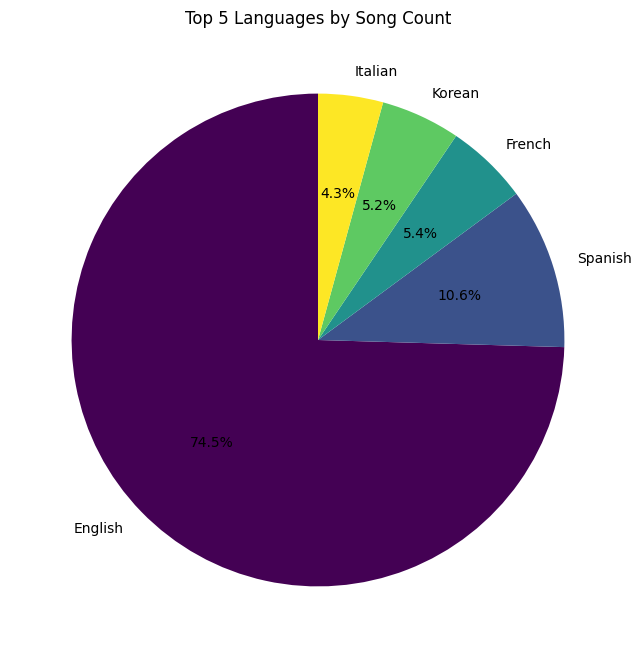

In [12]:
# Pie chart for language distribution
plt.figure(figsize=(8, 8))
df['language'].value_counts().head(5).plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Top 5 Languages by Song Count')
plt.ylabel('')
plt.show()


## How has song popularity evolved over the years?

In [13]:
# Convert release_date to datetime and extract year
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year

# Average popularity by year
yearly_popularity = df.groupby('release_year')['popularity'].mean()

print(yearly_popularity)


release_year
1994    50.067568
1995    50.014802
1996    50.823877
1997    52.466667
1998    50.500595
1999    51.148328
2000    51.611307
2001    50.869863
2002    50.491637
2003    51.273939
2004    50.035067
2005    50.668047
2006    50.305706
2007    50.734356
2008    50.431629
2009    49.843998
2010    50.085732
2011    50.601449
2012    51.170031
2013    51.005981
2014    50.246869
2015    51.395961
2016    52.077110
2017    50.269053
2018    50.420189
2019    52.321491
2020    50.533333
2021    49.971564
2022    51.290076
2023    49.950860
2024    51.074074
Name: popularity, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


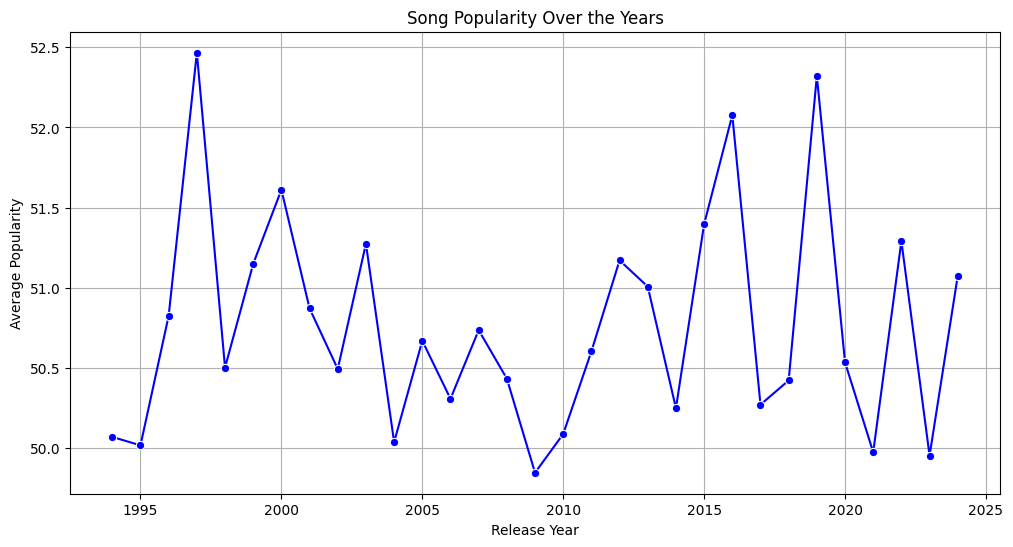

In [14]:
# Line plot for popularity over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_popularity.index, y=yearly_popularity.values, marker='o', color='blue')
plt.title('Song Popularity Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.show()


## Do songs with explicit content tend to be more popular?

In [15]:
# Average popularity for explicit vs non-explicit songs
explicit_popularity = df.groupby('explicit_content')['popularity'].mean()

print(explicit_popularity)


explicit_content
No     50.917004
Yes    50.650759
Name: popularity, dtype: float64


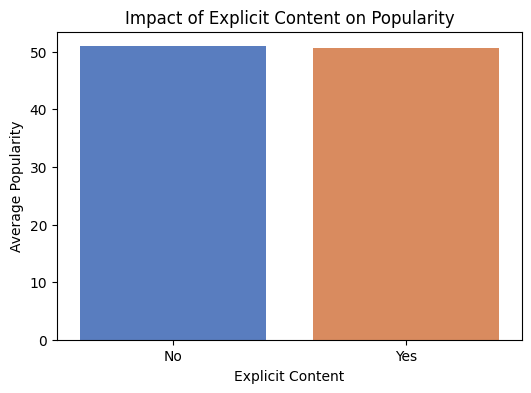

In [16]:
# Barplot for explicit vs non-explicit popularity
plt.figure(figsize=(6, 4))
sns.barplot(x=explicit_popularity.index, y=explicit_popularity.values, palette='muted')
plt.title('Impact of Explicit Content on Popularity')
plt.xlabel('Explicit Content')
plt.ylabel('Average Popularity')
plt.show()
